In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import hvplot
from matplotlib import cm
from datetime import datetime
from pyproj import Transformer
from scipy.ndimage import convolve
# import holoviews as hv
# from holoviews import opts

# hv.extension('bokeh', 'matplotlib')

In [2]:
%run -i ncbx_funcs.py

In [3]:
url_CSNV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw44/Output/dorian_his.ncml'
url_CSYV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw45/Output/dorian_his.ncml'
url_FSYV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw50/Output/dorian_his.ncml'
url_FSNV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw51/Output/dorian_his.ncml'
#url_CSYV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw45/Output/dorian_his.ncml'
run = 'CSYV'
ds_CSYV = xr.open_dataset(url_CSYV)
ds_CSNV = xr.open_dataset(url_CSNV)
ds_FSYV = xr.open_dataset(url_FSYV)
ds_FSNV = xr.open_dataset(url_FSNV)
ds_CSYV

<xarray.Dataset>
Dimensions:                 (tracer: 4, NST: 3, s_rho: 8, s_w: 9,
                             eta_rho: 1057, xi_rho: 1317, eta_u: 1057,
                             xi_u: 1316, eta_v: 1056, xi_v: 1317,
                             eta_psi: 1056, xi_psi: 1316, ocean_time: 37,
                             NVEG: 3, Nbed: 1)
Coordinates:
  * s_rho                   (s_rho) float64 -0.9375 -0.8125 ... -0.1875 -0.0625
  * s_w                     (s_w) float64 -1.0 -0.875 -0.75 ... -0.25 -0.125 0.0
    lon_rho                 (eta_rho, xi_rho) float64 ...
    lat_rho                 (eta_rho, xi_rho) float64 ...
    lon_u                   (eta_u, xi_u) float64 ...
    lat_u                   (eta_u, xi_u) float64 ...
    lon_v                   (eta_v, xi_v) float64 ...
    lat_v                   (eta_v, xi_v) float64 ...
    lon_psi                 (eta_psi, xi_psi) float64 ...
    lat_psi                 (eta_psi, xi_psi) float64 ...
  * ocean_time              (ocean_time) datetime64[ns] 2019-09-06T10:15:00.0...
Dimensions without coordinates: tracer, NST, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi, NVEG, Nbed
Data variables: (12/182)
    ntimes                  int32 ...
    ndtfast                 int32 ...
    dt                      float64 ...
    dtfast                  float64 ...
    dstart                  datetime64[ns] ...
    nHIS                    int32 ...
    ...                      ...
    Dwave                   (ocean_time, eta_rho, xi_rho) float32 ...
    Pwave_top               (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_fric             (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_break            (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_wcap             (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_roller           (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/33)
    file:                      ./Output/Dorian_NCB_his_00019.nc
    format:                    netCDF-3 64bit offset file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Hurricane Dorian North Core Banks
    var_info:                  varinfo.dat
    ...                        ...
    tiling:                    015x012
    history:                   ROMS/TOMS, Version 3.9, Saturday - October 15,...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               COREBANKS, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX,...
    EXTRA_DIMENSION.N:         8
    EXTRA_DIMENSION.boundary:  4

In [4]:
t=ds_CSYV.ocean_time.load()
tstring = pd.to_datetime(t).strftime('%Y-%m-%d %H:%M')
tstring

Index(['2019-09-06 10:15', '2019-09-06 10:30', '2019-09-06 10:45',
       '2019-09-06 11:00', '2019-09-06 11:15', '2019-09-06 11:30',
       '2019-09-06 11:45', '2019-09-06 12:00', '2019-09-06 12:15',
       '2019-09-06 12:30', '2019-09-06 12:45', '2019-09-06 13:00',
       '2019-09-06 13:14', '2019-09-06 13:29', '2019-09-06 13:44',
       '2019-09-06 13:59', '2019-09-06 14:14', '2019-09-06 14:29',
       '2019-09-06 14:45', '2019-09-06 15:00', '2019-09-06 15:15',
       '2019-09-06 15:30', '2019-09-06 15:45', '2019-09-06 16:00',
       '2019-09-06 16:15', '2019-09-06 16:30', '2019-09-06 16:45',
       '2019-09-06 17:00', '2019-09-06 17:15', '2019-09-06 17:30',
       '2019-09-06 17:45', '2019-09-06 18:00', '2019-09-06 18:15',
       '2019-09-06 18:30', '2019-09-06 18:45', '2019-09-06 19:00',
       '2019-09-06 19:15'],
      dtype='object')

In [5]:
# load lat/lon, convert to island coordinates
lon = np.squeeze( ds_CSYV.lon_rho.load().values )
lat = np.squeeze( ds_CSYV.lat_rho.load().values )

# Convert lat/lon to UTM zone 18N, and then to island coordinates
transformer = Transformer.from_crs( 'epsg:4326', 'epsg:26918',  ) # WGS84 to UTM18
utmx, utmy = transformer.transform( lat, lon )
xisl, yisl = UTM2Island(utmx, utmy, eoff=383520.0, noff=3860830.0, rot=42.0)
print('Shape of xisl, yisl: ', xisl.shape, yisl.shape)

Shape of xisl, yisl:  (1057, 1317) (1057, 1317)


In [6]:
# load initial and final bathymetry
# Minus sign converts from depth to elevation
bathi = -ds_CSYV.bath[1,:,:].load().values
bathf_CSYV = -ds_CSYV.bath[-1,:,:].load().values
bdiff_CSYV = bathf_CSYV - bathi

bathf_CSNV = -ds_CSNV.bath[-1,:,:].load().values
bdiff_CSNV = bathf_CSNV - bathi

bathf_FSYV = -ds_FSYV.bath[-1,:,:].load().values
bdiff_FSYV = bathf_FSYV - bathi

bathf_FSNV = -ds_FSNV.bath[-1,:,:].load().values
bdiff_FSNV = bathf_FSNV - bathi

# smooth bathy for making contour maps
# experimenting with size of kernal suggest 15 is ok
ik = 15
k = np.ones((ik, ik)) / (ik*ik)
bathis = convolve(bathi,k,mode='nearest')
bathfs_CSYV = convolve(bathf_CSYV,k,mode='nearest')
bathfs_CSNV = convolve(bathf_CSNV,k,mode='nearest')
bathfs_FSYV = convolve(bathf_FSYV,k,mode='nearest')
bathfs_FSNV = convolve(bathf_FSNV,k,mode='nearest')

In [8]:
# Use a central line for cross-shore distance
y = np.squeeze( yisl[:,550] )

# find the average shoreline location
mbathi = np.mean(bathi[:,100:1200], axis=1)
mbathf_CSYV = np.mean(bathf_CSYV[:,100:1200], axis=1)
mbathf_CSNV = np.mean(bathf_CSNV[:,100:1200], axis=1)
mbathf_FSYV = np.mean(bathf_FSYV[:,100:1200], axis=1)
mbathf_FSNV = np.mean(bathf_FSNV[:,100:1200], axis=1)

ishorey = np.argwhere(mbathi>=0.)[0]
print(ishorey, y[ishorey])

# use this for the cross-shore location by adding the offset
offset = y[ishorey]
y = y-offset
yisl = yisl-offset
xisl = xisl-np.min(xisl[ishorey])
# make the alongshore coordinates
x = np.squeeze( xisl[ishorey] - np.min(xisl[ishorey]) )

# area calculations
pm = ds_CSYV.pm[:,:].load().values
pn = ds_CSYV.pn[:,:].load().values
area = 1./pm * 1./pn
print('Shape of area: ', area.shape)

[168] [0.]
Shape of area:  (1057, 1317)


#### Four-run before/after diff

/tmp/ipykernel_263950/1698431257.py:17: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=hspace, wspace=wspace)
/tmp/ipykernel_263950/1698431257.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1 = axs[0,0].pcolormesh(xisl,yisl, bathfs_CSYV,cmap='terrain',vmin=-2,vmax=5)
/tmp/ipykernel_263950/1698431257.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=axs[0,1].pcolormesh(xisl, yisl, bdiff_CSYV, cmap='seismic', vmin=-4, vmax=4)
/tmp/ipykernel_263950/

CSYV Max., min., and mean bed diff.: 1.4781654 -4.5415716 -0.05071116
CSNV Max., min., and mean bed diff.: 2.3433573 -5.151828 -0.07011007
FSYV Max., min., and mean bed diff.: 1.7666502 -4.8654976 -0.07711348
FSNV Max., min., and mean bed diff.: 2.9108996 -6.1700535 -0.13296893


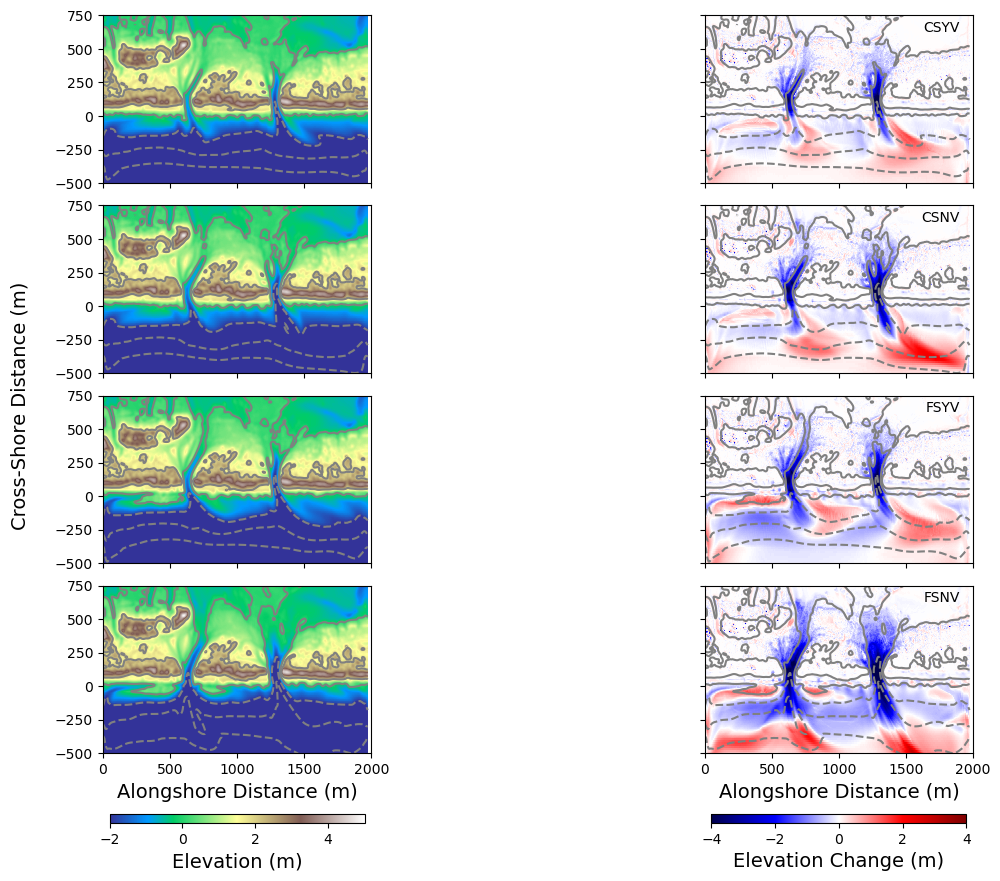

In [9]:
xs = 0
xe = 2000
ys = -500
ye = 750
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

hspace = 0.02
wspace = .02

levels = np.array( [-6, -4, -2, 0., 2.] )
fig, axs = plt.subplots(4,2,figsize=(12,8),sharex=True, sharey=True, constrained_layout=True)
plt.subplots_adjust(hspace=hspace, wspace=wspace)


# CSVY
m1 = axs[0,0].pcolormesh(xisl,yisl, bathfs_CSYV,cmap='terrain',vmin=-2,vmax=5)
m1c = axs[0,0].contour(xisl,yisl, bathfs_CSYV,levels,colors='gray',vmin=-2,vmax=5)
#axs[0,0].text(0.95, 0.9, 'CSYV', transform=axs[0,0].transAxes, ha='right')
axs[0,0].set_xlim([xs, xe])
axs[0,0].set_ylim([ys, ye])
axs[0,0].set_aspect('equal')

m0=axs[0,1].pcolormesh(xisl, yisl, bdiff_CSYV, cmap='seismic', vmin=-4, vmax=4)
axs[0,1].contour(xisl, yisl, bathfs_CSYV, levels, colors='gray')
axs[0,1].text(0.95, 0.9, 'CSYV', transform=axs[0,1].transAxes, ha='right')
axs[0,1].set_xlim([xs, xe])
axs[0,1].set_ylim([ys, ye])
axs[0,1].set_aspect('equal')

#CSNV
m1 = axs[1,0].pcolormesh(xisl,yisl, bathfs_CSNV,cmap='terrain',vmin=-2,vmax=5)
m1c = axs[1,0].contour(xisl,yisl, bathfs_CSNV,levels,colors='gray',vmin=-2,vmax=5)
#axs[1,0].text(0.95, 0.9, 'CSNV', transform=axs[1,0].transAxes, ha='right')
axs[1,0].set_xlim([xs, xe])
axs[1,0].set_ylim([ys, ye])
axs[1,0].set_aspect('equal')

m0=axs[1,1].pcolormesh(xisl, yisl, bdiff_CSNV, cmap='seismic', vmin=-4, vmax=4)
axs[1,1].contour(xisl, yisl, bathfs_CSNV, levels, colors='gray')
axs[1,1].text(0.95, 0.9, 'CSNV', transform=axs[1,1].transAxes, ha='right')
axs[1,1].set_xlim([xs, xe])
axs[1,1].set_ylim([ys, ye])
axs[1,1].set_aspect('equal')

#FSYV
m1 = axs[2,0].pcolormesh(xisl,yisl, bathfs_FSYV,cmap='terrain',vmin=-2,vmax=5)
m1c = axs[2,0].contour(xisl,yisl, bathfs_FSYV,levels,colors='gray',vmin=-2,vmax=5)
#axs[2,0].text(0.95, 0.9, 'FSYV', transform=axs[2,0].transAxes, ha='right')
axs[2,0].set_xlim([xs, xe])
axs[2,0].set_ylim([ys, ye])
axs[2,0].set_aspect('equal')

m0=axs[2,1].pcolormesh(xisl, yisl, bdiff_FSYV, cmap='seismic', vmin=-4, vmax=4)
axs[2,1].contour(xisl, yisl, bathfs_FSYV, levels, colors='gray')
axs[2,1].text(0.95, 0.9, 'FSYV', transform=axs[2,1].transAxes, ha='right')
axs[2,1].set_xlim([xs, xe])
axs[2,1].set_ylim([ys, ye])
axs[2,1].set_aspect('equal')

#FSNV
m1 = axs[3,0].pcolormesh(xisl,yisl, bathfs_FSNV,cmap='terrain',vmin=-2,vmax=5)
m1c = axs[3,0].contour(xisl,yisl, bathfs_FSNV,levels,colors='gray',vmin=-2,vmax=5)
#axs[3,0].text(0.95, 0.9, 'FSNV', transform=axs[3,0].transAxes, ha='right')
axs[3,0].set_xlim([xs, xe])
axs[3,0].set_ylim([ys, ye])
axs[3,0].set_aspect('equal')

m0=axs[3,1].pcolormesh(xisl, yisl, bdiff_FSNV, cmap='seismic', vmin=-4, vmax=4)
axs[3,1].text(0.95, 0.9, 'FSNV', transform=axs[3,1].transAxes, ha='right')
axs[3,1].contour(xisl, yisl, bathfs_FSNV, levels, colors='gray')
axs[3,1].set_xlim([xs, xe])
axs[3,1].set_ylim([ys, ye])
axs[3,1].set_aspect('equal')

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins0 = inset_axes(axs[3,0],
                    width="95%",  
                    height="5%",
                    loc='lower center',
                    borderpad=-5
                   )
cb0 = fig.colorbar(m1, cax=axins0, orientation="horizontal")
cb0.set_label(label='Elevation (m)', size=14)

axins1 = inset_axes(axs[3,1],
                    width="95%",  
                    height="5%",
                    loc='lower center',
                    borderpad=-5
                   )
cb1 = fig.colorbar(m0, cax=axins1, orientation="horizontal")
cb1.set_label(label='Elevation Change (m)', size=14)

# cbar_ax = fig.add_axes([0.4, 0.2, 0.04, 0.5])
# cb0 = fig.colorbar(m1, cax=cbar_ax, label='Elevation (m)')
# cb0.set_label(label='Elevation (m)', size=14)
# cbar_ax2 = fig.add_axes([0.9, 0.2, 0.04, 0.5])
# cb1 = fig.colorbar(m0, cax=cbar_ax2, label='Elevation Change (m)')
# cb1.set_label(label='Elevation Change (m)', size=14)

fig.text(0.06, 0.5, 'Cross-Shore Distance (m)', fontsize=14, va='center', rotation='vertical')
axs[3,0].set_xlabel('Alongshore Distance (m)', fontsize=14)
axs[3,1].set_xlabel('Alongshore Distance (m)', fontsize=14)

fig.subplots_adjust(right=0.8)

figname = 'four_run_elevation_change.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 
print('CSYV Max., min., and mean bed diff.:', np.max(bdiff_CSYV),np.min(bdiff_CSYV),np.mean(bdiff_CSYV))
print('CSNV Max., min., and mean bed diff.:', np.max(bdiff_CSNV),np.min(bdiff_CSNV),np.mean(bdiff_CSNV))
print('FSYV Max., min., and mean bed diff.:', np.max(bdiff_FSYV),np.min(bdiff_FSYV),np.mean(bdiff_FSYV))
print('FSNV Max., min., and mean bed diff.:', np.max(bdiff_FSNV),np.min(bdiff_FSNV),np.mean(bdiff_FSNV))

In [10]:
sed2i_CSYV = np.squeeze( ds_CSYV.sandmass_02[0,:,:,:].load().values )
sed2f_CSYV = np.squeeze( ds_CSYV.sandmass_02[-1,:,:,:].load().values )
sed3i_CSYV = np.squeeze( ds_CSYV.sandmass_03[0,:,:,:].load().values )
sed3f_CSYV = np.squeeze( ds_CSYV.sandmass_03[-1,:,:,:].load().values )

sed2i_CSNV = np.squeeze( ds_CSNV.sandmass_02[0,:,:,:].load().values )
sed2f_CSNV = np.squeeze( ds_CSNV.sandmass_02[-1,:,:,:].load().values )
sed3i_CSNV = np.squeeze( ds_CSNV.sandmass_03[0,:,:,:].load().values )
sed3f_CSNV = np.squeeze( ds_CSNV.sandmass_03[-1,:,:,:].load().values )

sed2i_FSYV = np.squeeze( ds_FSYV.sandmass_02[0,:,:,:].load().values )
sed2f_FSYV = np.squeeze( ds_FSYV.sandmass_02[-1,:,:,:].load().values )
sed3i_FSYV = np.squeeze( ds_FSYV.sandmass_03[0,:,:,:].load().values )
sed3f_FSYV = np.squeeze( ds_FSYV.sandmass_03[-1,:,:,:].load().values )

sed2i_FSNV = np.squeeze( ds_FSNV.sandmass_02[0,:,:,:].load().values )
sed2f_FSNV = np.squeeze( ds_FSNV.sandmass_02[-1,:,:,:].load().values )
sed3i_FSNV = np.squeeze( ds_FSNV.sandmass_03[0,:,:,:].load().values )
sed3f_FSNV = np.squeeze( ds_FSNV.sandmass_03[-1,:,:,:].load().values )

In [11]:
sedmove_CSYV = (sed2f_CSYV-sed2i_CSYV)+(sed3f_CSYV-sed3i_CSYV)
sedmove_CSNV = (sed2f_CSNV-sed2i_CSNV)+(sed3f_CSNV-sed3i_CSNV)
sedmove_FSYV = (sed2f_FSYV-sed2i_FSYV)+(sed3f_FSYV-sed3i_FSYV)
sedmove_FSNV = (sed2f_FSNV-sed2i_FSNV)+(sed3f_FSNV-sed3i_FSNV)

/tmp/ipykernel_263950/598327531.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, sedmove_CSYV, cmap='seismic',vmin=-5000, vmax=5000)
/tmp/ipykernel_263950/598327531.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, sedmove_CSNV, cmap='seismic',vmin=-5000, vmax=5000)
/tmp/ipykernel_263950/598327531.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply e

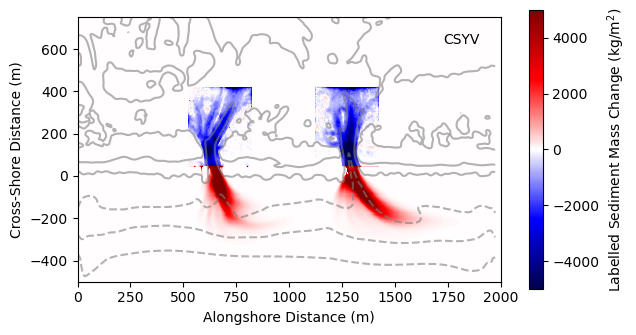

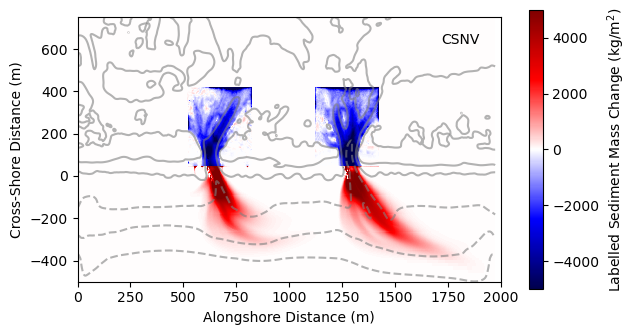

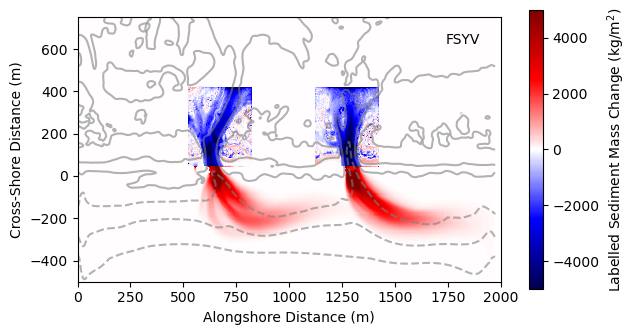

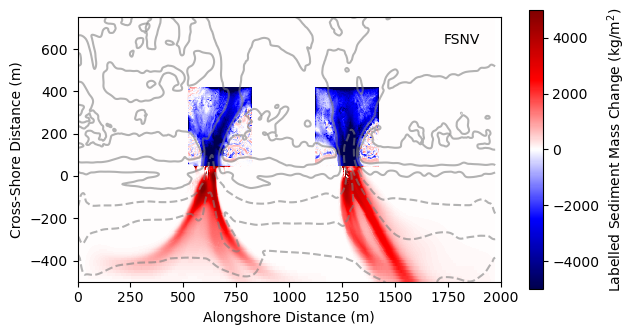

In [12]:
xs = 0
xe = 2000
ys = -500
ye = 750
levels = np.array( [-6, -4, -2, 0., 2.] )

fig, (ax0) = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, sedmove_CSYV, cmap='seismic',vmin=-5000, vmax=5000)
ax0.contour(xisl, yisl, bathfs_CSYV, levels, colors='gray', alpha=.6)
ax0.text(0.95, 0.9, 'CSYV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label = 'Labelled Sediment Mass Change (kg/m$^2$)')
figname = 'CSYV_labelled_sed_mass_diff.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 

fig, ax0 = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, sedmove_CSNV, cmap='seismic',vmin=-5000, vmax=5000)
ax0.contour(xisl, yisl, bathfs_CSNV, levels, colors='gray', alpha=.6)
ax0.text(0.95, 0.9, 'CSNV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label = 'Labelled Sediment Mass Change (kg/m$^2$)')
figname = 'CSNV_labelled_sed_mass_diff.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

fig, ax0 = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, sedmove_FSYV, cmap='seismic',vmin=-5000, vmax=5000)
ax0.contour(xisl, yisl, bathfs_FSYV, levels, colors='gray', alpha=.6)
ax0.text(0.95, 0.9, 'FSYV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label = 'Labelled Sediment Mass Change (kg/m$^2$)')
figname = 'FSYV_labelled_sed_mass_diff.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

fig, ax0 = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, sedmove_FSNV, cmap='seismic',vmin=-5000, vmax=5000)
ax0.contour(xisl, yisl, bathfs_FSNV, levels, colors='gray', alpha=.6)
ax0.text(0.95, 0.9, 'FSNV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label = 'Labelled Sediment Mass Change (kg/m$^2$)')
figname = 'FSNV_labelled_sed_mass_diff.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

In [13]:
i0 = np.argwhere(y>=0.)[0]
print('i0, y[i0]:',i0, y[i0])
dy = np.diff(y)
dy = np.append( dy, dy[-1] )

voli = np.sum( (sed2i_CSYV + sed3i_CSYV), axis=1 )
volf_CSYV = np.sum( (sed2f_CSYV + sed3f_CSYV), axis=1 )
volf_CSNV = np.sum( (sed2f_CSNV + sed3f_CSNV), axis=1 )
volf_FSYV = np.sum( (sed2f_FSYV + sed3f_FSYV), axis=1 )
volf_FSNV = np.sum( (sed2f_FSNV + sed3f_FSNV), axis=1 )

delvol_CSYV = volf_CSYV -voli
delvol_CSNV = volf_CSNV -voli
delvol_FSYV = volf_FSYV -voli
delvol_FSNV = volf_FSNV -voli

zcols = ['#ca0020','#f4a582','#bababa','#404040']

i0, y[i0]: [168] [0.]


CSYV
Sum:  41.013668
[94] [-3.7679536] [-265.00044433]
[138] [-0.814461] [-45.00007557]
CSNV
Sum:  52.124184
[74] [-5.083361] [-365.00061158]
[128] [-1.4738126] [-95.00015947]
FSYV
Sum:  47.44395
[91] [-4.3522425] [-280.00046943]
[130] [-1.1502272] [-85.00014269]
FSNV
Sum:  55.20159
[47] [-8.629877] [-720.00120351]
[110] [-3.4857528] [-185.00031036]


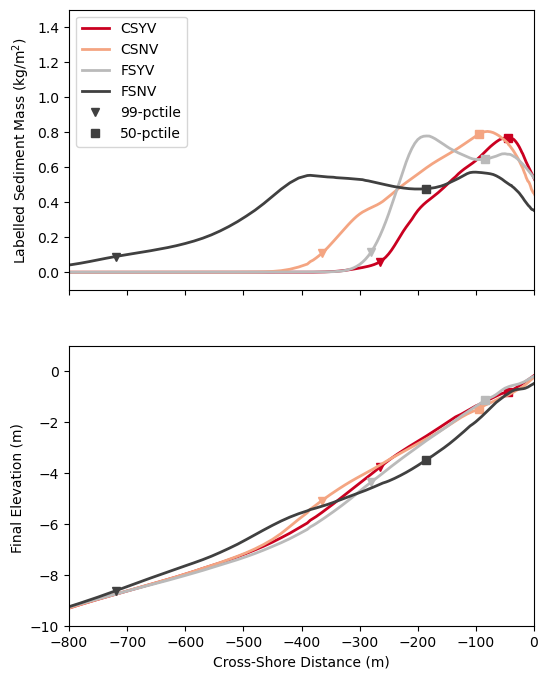

In [14]:
def offshore( volf, bathy, y, idx=168 ):
    # find indices and values for 1% and 50% limits in profiles
    sum_sed = np.sum( volf[0:idx]/1.e6)
    print('Sum: ',sum_sed )
    cum_sed = np.cumsum( volf[0:idx]/1.e6 )
    p1i = np.argwhere( cum_sed/sum_sed >= .01 )[0]
    print(p1i, bathy[p1i], y[p1i] )
    p50i = np.argwhere( cum_sed/sum_sed >= .5 )[0]
    print(p50i, bathy[p50i], y[p50i] )
    return p1i, bathy[p1i], p50i, bathy[p50i]
    
print('CSYV')
p1i_CSYV, z1_CSYV, p50i_CSYV, z50_CSYV = offshore( volf_CSYV, mbathf_CSYV, y )
print('CSNV')
p1i_CSNV, z1_CSNV, p50i_CSNV, z50_CSNV = offshore( volf_CSNV, mbathf_CSNV, y )
print('FSYV')
p1i_FSYV, z1_FSYV, p50i_FSYV, z50_FSYV = offshore( volf_FSYV, mbathf_FSYV, y )
print('FSNV')
p1i_FSNV, z1_FSNV, p50i_FSNV, z50_FSNV = offshore( volf_FSNV, mbathf_FSNV, y )

fig, axs = plt.subplots( 2, 1, figsize=(6,8), sharex=True)
axs[0].plot(y, volf_CSYV/1.e6, c = zcols[0], linewidth=2, label='CSYV')
axs[0].plot(y[p1i_CSYV],volf_CSYV[p1i_CSYV]/1.e6,'v',  c = zcols[0] )
axs[0].plot(y[p50i_CSYV],volf_CSYV[p50i_CSYV]/1.e6,'s',  c = zcols[0] )

axs[0].plot(y, volf_CSNV/1.e6, c = zcols[1], linewidth=2, label='CSNV')
axs[0].plot(y[p1i_CSNV],volf_CSNV[p1i_CSNV]/1.e6,'v',  c = zcols[1] )
axs[0].plot(y[p50i_CSNV],volf_CSNV[p50i_CSNV]/1.e6,'s',  c = zcols[1] )

axs[0].plot(y, volf_FSYV/1.e6, c = zcols[2], linewidth=2, label='FSYV')
axs[0].plot(y[p1i_FSYV],volf_FSYV[p1i_FSYV]/1.e6,'v',  c = zcols[2] )
axs[0].plot(y[p50i_FSYV],volf_FSYV[p50i_FSYV]/1.e6,'s',  c = zcols[2] )

axs[0].plot(y, volf_FSNV/1.e6, c = zcols[3], linewidth=2, label='FSNV')
axs[0].plot(y[p1i_FSNV],volf_FSNV[p1i_FSNV]/1.e6,'v',  c = zcols[3], label='99-pctile'  )
axs[0].plot(y[p50i_FSNV],volf_FSNV[p50i_FSNV]/1.e6,'s',  c = zcols[3], label='50-pctile' )

axs[0].set_xlim(-800, 0)
axs[0].set_ylim(-0.1, 1.5)
axs[0].set_ylabel('Labelled Sediment Mass (kg/m$^2$) ')
axs[0].legend(loc='upper left')

axs[1].plot(y, mbathf_CSYV, c = zcols[0], linewidth=2)
axs[1].plot(y[p1i_CSYV],z1_CSYV,'v',  c = zcols[0] )
axs[1].plot(y[p50i_CSYV],z50_CSYV,'s',  c = zcols[0] )

axs[1].plot(y, mbathf_CSNV, c = zcols[1], linewidth=2)
axs[1].plot(y[p1i_CSNV],z1_CSNV,'v',  c = zcols[1])
axs[1].plot(y[p50i_CSNV],z50_CSNV,'s',  c = zcols[1] )

axs[1].plot(y, mbathf_FSYV, c = zcols[2], linewidth=2)
axs[1].plot(y[p1i_FSYV],z1_FSYV,'v',  c = zcols[2] )
axs[1].plot(y[p50i_FSYV],z50_FSYV,'s',  c = zcols[2] )

axs[1].plot(y, mbathf_FSNV, c = zcols[3], linewidth=2)
axs[1].plot(y[p1i_FSNV],z1_FSNV,'v',  c = zcols[3] )
axs[1].plot(y[p50i_FSNV],z50_FSNV,'s',  c = zcols[3] )

axs[1].set_xlim(-800, 0)
axs[1].set_ylim(-10, 1)

axs[1].set_ylabel('Final Elevation (m) ')
axs[1].set_xlabel('Cross-Shore Distance (m)' )
figname = 'four_labelled_sed_profiles.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

/tmp/ipykernel_263950/2413702351.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, bdiff_CSYV, cmap='seismic', vmin=-4, vmax=4)


CSYV: Max., min., and mean bed diff.: 1.4781654 -4.5415716 -0.05071116


/tmp/ipykernel_263950/2413702351.py:22: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, bdiff_CSNV, cmap='seismic', vmin=-4, vmax=4)


CSNV: Max., min., and mean bed diff.: 2.3433573 -5.151828 -0.07011007


/tmp/ipykernel_263950/2413702351.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, bdiff_FSYV, cmap='seismic', vmin=-4, vmax=4)


FSYV: Max., min., and mean bed diff.: 1.7666502 -4.8654976 -0.07711348


/tmp/ipykernel_263950/2413702351.py:50: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, bdiff_FSNV, cmap='seismic', vmin=-4, vmax=4)


FSNV: Max., min., and mean bed diff.: 2.9108996 -6.1700535 -0.13296893


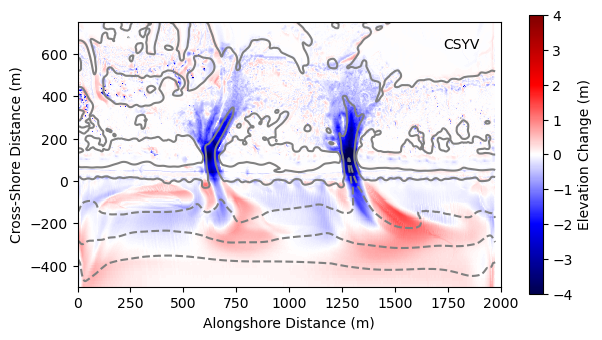

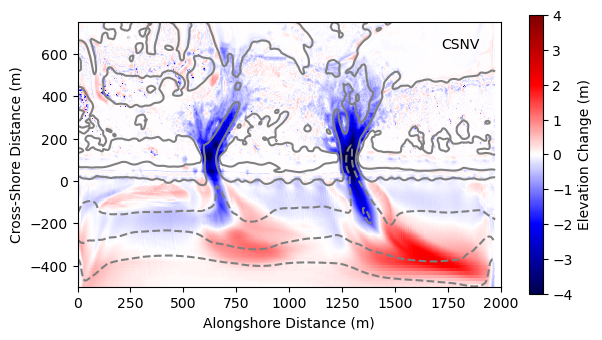

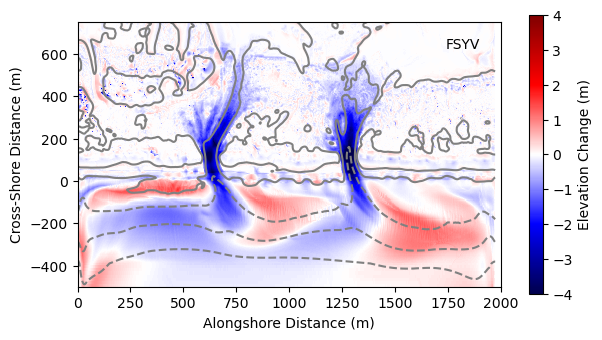

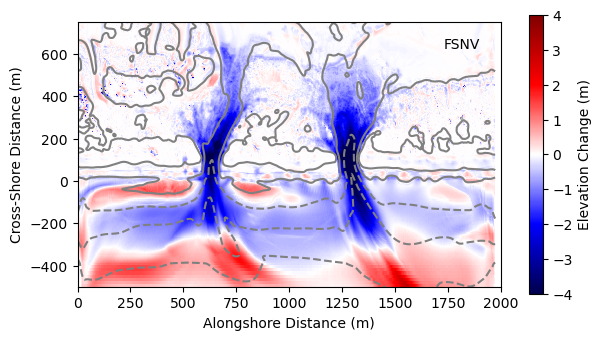

In [15]:
xs = 0
xe = 2000
ys = -500
ye = 750
levels = np.array( [-6, -4, -2, 0., 2.] )

fig, (ax0) = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, bdiff_CSYV, cmap='seismic', vmin=-4, vmax=4)
ax0.contour(xisl, yisl, bathfs_CSYV, levels, colors='gray')
ax0.text(0.95, 0.9, 'CSYV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label='Elevation Change (m)')
figname = 'CSYV_elevation_change.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 
print('CSYV: Max., min., and mean bed diff.:', np.max(bdiff_CSYV),np.min(bdiff_CSYV),np.mean(bdiff_CSYV))

fig, (ax0) = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, bdiff_CSNV, cmap='seismic', vmin=-4, vmax=4)
ax0.contour(xisl, yisl, bathfs_CSNV, levels, colors='gray')
ax0.text(0.95, 0.9, 'CSNV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label='Elevation Change (m)')
figname = 'CSNV_elevation_change.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 
print('CSNV: Max., min., and mean bed diff.:', np.max(bdiff_CSNV),np.min(bdiff_CSNV),np.mean(bdiff_CSNV))

fig, (ax0) = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, bdiff_FSYV, cmap='seismic', vmin=-4, vmax=4)
ax0.contour(xisl, yisl, bathfs_FSYV, levels, colors='gray')
ax0.text(0.95, 0.9, 'FSYV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label='Elevation Change (m)')
figname = 'FSYV_elevation_change.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 
print('FSYV: Max., min., and mean bed diff.:', np.max(bdiff_FSYV),np.min(bdiff_FSYV),np.mean(bdiff_FSYV))

fig, (ax0) = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, bdiff_FSNV, cmap='seismic', vmin=-4, vmax=4)
ax0.contour(xisl, yisl, bathfs_FSNV, levels, colors='gray')
ax0.text(0.95, 0.9, 'FSNV', transform=ax0.transAxes, ha='right')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label='Elevation Change (m)')
figname = 'FSNV_elevation_change.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 
print('FSNV: Max., min., and mean bed diff.:', np.max(bdiff_FSNV),np.min(bdiff_FSNV),np.mean(bdiff_FSNV))

In [16]:
def mask_array( x, wdm ):
    s = wdm.shape
    wdmr = np.ravel(wdm)
    xr = np.ravel(x)
    xr[np.where(wdmr==0)]=np.nan
    xm = np.reshape( xr, s )
    return xm

def nan_array_low( x, val=0.1 ):
    s = x.shape
    xr = np.ravel(x)
    xr[np.where(xr<=val)]=np.nan
    xm = np.reshape( xr, s )
    return xm

def despeckle( x, iks = 3 ):
    # despeckle like this? This expands the NaN regions with a 3x3 matrix
    ks = np.ones((iks, iks)) / (iks*iks)
    xs = convolve(x,ks,mode='nearest')
    return xs

#### Maps of water level and velocity vectorys for an animation

In [ ]:
# contour levels
levels = np.array( [-6, -4, -2, 0., 2.] )

# pick a time index
# 0, 19, and 31
idx_list = [31]
for idx in np.arange(0, len(tstring), 2 ):
#for idx in idx_list:
    # load bathy and smooth for contouring
    bath = np.squeeze( ds_CSYV.bath[idx,:,:].load().values )

    ik = 15
    k = np.ones((ik, ik)) / (ik*ik)
    baths = convolve(bath,k,mode='nearest')

    # load water elevation and mask dry regions
    zeta = np.squeeze( ds_CSYV.zeta[idx,:,:].load().values )
    wdm = np.squeeze( ds_CSYV.wetdry_mask_rho[idx,:,:].load().values )
    zeta = despeckle( mask_array( zeta, wdm ) )

    # load wave height and mask dry regions
    hwave = np.squeeze( ds_CSYV.Hwave[idx,:,:].load().values )
    hwave = despeckle( mask_array( hwave, wdm ) )

    # load velocities
    u = despeckle( mask_array( np.squeeze( ds_CSYV.ubar[idx,:,:].load().values),
                              np.squeeze( ds_CSYV.wetdry_mask_u[idx,:,:].load().values) ) )
    v = despeckle( mask_array( np.squeeze( ds_CSYV.vbar[idx,:,:].load().values), 
                              np.squeeze( ds_CSYV.wetdry_mask_v[idx,:,:].load().values) ) )

    # print('xisl:',np.shape(xisl))
    # print('yisl:',np.shape(yisl))
    # print('u:',np.shape(u))
    # print('v:',np.shape(v))

    uc = 0.5 * (u[0:-1,:]+u[1:,:])
    vc = 0.5 * (v[:,0:-1]+v[:,1:])
    # print('uc:',np.shape(uc))
    # print('vc:',np.shape(vc))

    spd = np.sqrt( uc**2 + vc**2 )
    # print('spd:',np.shape(spd))

    # decimate velocities
    dfac = 20
    ud = uc[::dfac, ::dfac]
    vd = vc[::dfac, ::dfac]
    xd = xisl[::dfac, ::dfac]
    yd = yisl[::dfac, ::dfac]

    # print('xd:',np.shape(xd))
    # print('yd:',np.shape(yd))
    # print('ud:',np.shape(ud))
    # print('vd:',np.shape(vd))

    fig, [ax1, ax2]  = plt.subplots(2,1,figsize=(6,8),sharex=True)
    m1 = ax1.pcolormesh(xisl, yisl, zeta, cmap='YlGnBu_r',vmin=0, vmax=2.5, alpha = .6, zorder=0)
    m1c = ax1.contour(xisl,yisl,-baths,levels,colors='gray',vmin=-2,vmax=5, zorder=1)
    ax1.quiver(xd, yd, ud, vd, color='black', alpha=1, zorder=2)
    #plt.colorbar(m1, ax=ax1, fraction=0.046, pad=0.06)
    cbar1 = plt.colorbar(m1, ax=ax1, shrink=.75)
    cbar1.set_label(r'Water Level (m)', rotation=90)

    ax1.set_xlim([xs, xe])
    ax1.set_ylim([ys, ye])
    ax1.set_aspect('equal')
    ax1.text(0.95, 0.9, r'{}'.format(tstring[idx]), transform=ax1.transAxes, ha='right')

    m2c = ax2.contour(xisl,yisl,-baths,levels,colors='gray',vmin=-2,vmax=5, zorder=1)
    m2 = ax2.pcolormesh(xisl, yisl, hwave, cmap='coolwarm',vmin=0, vmax=3, alpha = .6, zorder=0)
    ax2.quiver(xd, yd, ud, vd, color='black', alpha=1, zorder=2)
    #plt.colorbar(m2, ax=ax2, fraction=0.046, pad=0.06)
    cbar2 = plt.colorbar(m2, ax=ax2, shrink=.75)
    cbar2.set_label(r'$H_s$ (m)', rotation=90)

    ax2.set_xlim([xs, xe])
    ax2.set_ylim([ys, ye])
    ax2.set_aspect('equal')
    ax2.set_xlabel('Alongshore Distance (m)')
    fig.text(0.02, 0.5, 'Cross-Shore Distance (m)', va='center', rotation='vertical')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

    # fig.tight_layout() 
    #ax2.text(0.35, 0.9, r'{}'.format(tstring[0]), transform=ax0.transAxes, ha='right')

    fig.savefig(run+'_vector_plot{}.png'.format(idx), dpi=200, bbox_inches='tight')

#### Max. stress, velocity plots

In [18]:
wdm = np.squeeze( ds_CSYV.wetdry_mask_rho[:,:,:].load().values )
print(np.shape(wdm))
wdm_mx = np.max( wdm, axis=0 )
print(np.shape(wdm_mx))

(37, 1057, 1317)
(1057, 1317)


In [19]:
bustrc = np.squeeze( ds_CSYV.bustrc[:,:,:].load().values )
bustrw = np.squeeze( ds_CSYV.bustrw[:,:,:].load().values )
bvstrc = np.squeeze( ds_CSYV.bvstrc[:,:,:].load().values )
bvstrw = np.squeeze( ds_CSYV.bvstrw[:,:,:].load().values )
ustrc = np.sqrt(bustrc**2+bvstrc**2)
ustrw = np.sqrt(bustrw**2+bvstrw**2)
taucw = np.sqrt( ustrc**2 + ustrw**2)
print(np.shape(bustrc))
ustrc_mx = np.nanmax( ustrc, axis=0 )
ustrw_mx = np.nanmax( ustrw, axis=0 )
taucw_mx = np.nanmax( taucw, axis=0 )
print(np.shape(taucw_mx))

(37, 1057, 1317)
(1057, 1317)


In [20]:
taucw_mxm = mask_array( taucw_mx, wdm_mx )

In [21]:
print(np.max(taucw_mx))
print(np.max(ustrc_mx))
print(np.max(ustrw_mx))
print(np.min(taucw_mx))
print(np.min(ustrc_mx))
print(np.min(ustrw_mx))

nan
151.7739
21.233093
nan
0.0
0.0


#### Max. stress plot

/tmp/ipykernel_263950/2021923604.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1 = ax1.pcolormesh(xisl, yisl, nan_array_low( ustrc_mx, 0.2 ), cmap='magma', vmin=0, vmax=60)


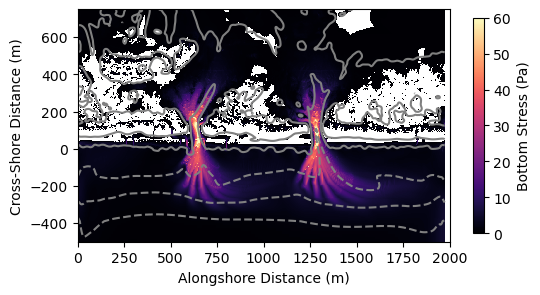

In [31]:
fig, ax1  = plt.subplots(1,1,figsize=(6,8),sharex=True)
m1 = ax1.pcolormesh(xisl, yisl, nan_array_low( ustrc_mx, 0.2 ), cmap='magma', vmin=0, vmax=60)

m1c = ax1.contour(xisl,yisl, bathfs_CSYV,levels,colors='gray',vmin=-2,vmax=5, zorder=1)
#m1s = ax1.pcolormesh(xd, yd, spd, cmap='YlGnBu_r',vmin=0, vmax=2.5, alpha = .6, zorder=0)
cbar1 = plt.colorbar(m1, ax=ax1, shrink=.35)
cbar1.set_label(r'Bottom Stress (Pa)', rotation=90)

ax1.set_xlim([xs, xe])
ax1.set_ylim([ys, ye])
ax1.set_aspect('equal')
ax1.set_ylabel('Cross-Shore Distance (m)')
ax1.set_xlabel('Alongshore Distance (m)')
fig.savefig('CSYV_max_bed_stress.png'.format(idx), dpi=200, bbox_inches='tight')

In [ ]:
#### WL and Stress plots for specific times

max spd: 5.411555
xd: (1057, 1317)
yd: (1057, 1317)
ud: (1056, 1316)
vd: (1056, 1316)


/tmp/ipykernel_263950/4054977838.py:86: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m2 = ax2.pcolormesh(xisl, yisl, taucw, cmap='magma', vmin=0, vmax=60)


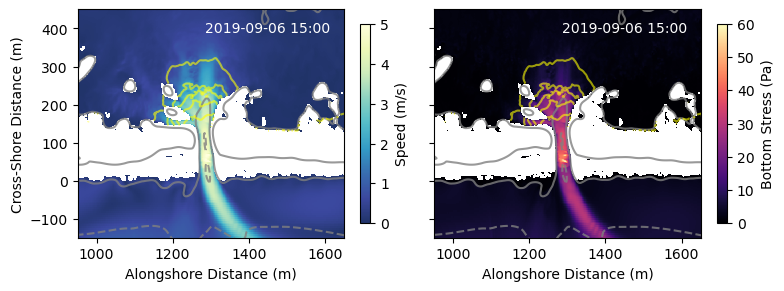

In [59]:
# contour levels
levels = np.array( [-6, -4, -2, 0., 2.] ) # bathy
zlevels = np.arange(1, 2.75, .25) # water levels

# Smoothing kernal
ik = 15
k = np.ones((ik, ik)) / (ik*ik)

# pick a time index
# 0, 19, and 31
idx_list = [19]
#for idx in np.arange(0, len(tstring), 2 ):

# Zoom in
xs = 950
xe = 1650
ys = -150
ye = 450

for idx in idx_list:

    # load bathy and smooth for contouring
    bath = np.squeeze( -ds_CSYV.bath[idx,:,:].load().values )
    baths = convolve(bath,k,mode='nearest')

    # load water elevation and mask dry regions
    zeta = np.squeeze( ds_CSYV.zeta[idx,:,:].load().values )
    wdm = np.squeeze( ds_CSYV.wetdry_mask_rho[idx,:,:].load().values )
    zeta = despeckle( mask_array( zeta, wdm ) )
    
    bustrc = np.squeeze( ds_CSYV.bustrc[idx,:,:].load().values )
    bustrw = np.squeeze( ds_CSYV.bustrw[idx,:,:].load().values )
    bvstrc = np.squeeze( ds_CSYV.bvstrc[idx,:,:].load().values )
    bvstrw = np.squeeze( ds_CSYV.bvstrw[idx,:,:].load().values )
    ustrc = np.sqrt(bustrc**2+bvstrc**2)
    ustrw = np.sqrt(bustrw**2+bvstrw**2)
    taucw = np.sqrt( ustrc**2 + ustrw**2)
    
    taucw = despeckle( mask_array( taucw, wdm ) )

    # # load wave height and mask dry regions
    # hwave = np.squeeze( ds_CSYV.Hwave[idx,:,:].load().values )
    # hwave = despeckle( mask_array( hwave, wdm ) )

    # load velocities
    u = despeckle( mask_array( np.squeeze( ds_CSYV.ubar[idx,:,:].load().values),
                              np.squeeze( ds_CSYV.wetdry_mask_u[idx,:,:].load().values) ) )
    v = despeckle( mask_array( np.squeeze( ds_CSYV.vbar[idx,:,:].load().values), 
                              np.squeeze( ds_CSYV.wetdry_mask_v[idx,:,:].load().values) ) )

    uc = 0.5 * (u[0:-1,:]+u[1:,:])
    vc = 0.5 * (v[:,0:-1]+v[:,1:])
    # print('uc:',np.shape(uc))
    # print('vc:',np.shape(vc))

    spd = np.sqrt( uc**2 + vc**2 )
    print('max spd:',np.nanmax(spd))
    
    # decimate velocities (for some reason, this makes u, v, and x, y the same shape
    dfac = 1
    ud = uc[::dfac, ::dfac]
    vd = vc[::dfac, ::dfac]
    xd = xisl[::dfac, ::dfac]
    yd = yisl[::dfac, ::dfac]

    print('xd:',np.shape(xd))
    print('yd:',np.shape(yd))
    print('ud:',np.shape(ud))
    print('vd:',np.shape(vd))

    fig, [ax1, ax2]  = plt.subplots(1, 2,figsize=(8,6),sharey=True)
    m1 = ax1.pcolormesh(xd, yd, spd, cmap='YlGnBu_r',vmin=0, vmax=5, alpha = .9, zorder=0)
    m1c = ax1.contour(xisl,yisl,baths,levels,colors='gray',vmin=-2,vmax=5, alpha=.8, zorder=1)
    m1s = ax1.contour(xd, yd, zeta, zlevels, colors='yellow',vmin=0, vmax=2.5, alpha = .6, zorder=1)

    cbar1 = plt.colorbar(m1, ax=ax1, shrink=.35)
    cbar1.set_label(r'Speed (m/s)', rotation=90)

    ax1.set_xlim([xs, xe])
    ax1.set_ylim([ys, ye])
    ax1.set_aspect('equal')
    ax1.set_ylabel('Cross-Shore Distance (m)')
    ax1.set_xlabel('Alongshore Distance (m)')
    ax1.text(0.95, 0.9, r'{}'.format(tstring[idx]), transform=ax1.transAxes, ha='right', c='white')
    
    m2 = ax2.pcolormesh(xisl, yisl, taucw, cmap='magma', vmin=0, vmax=60)
    m2c = ax2.contour(xisl,yisl,baths,levels,colors='gray',vmin=-2,vmax=5, alpha=.8, zorder=1)
    m2s = ax2.contour(xd, yd, zeta, zlevels, colors='yellow',vmin=0, vmax=2.5, alpha = .6, zorder=1)

    ax2.set_xlim([xs, xe])
    ax2.set_ylim([ys, ye])
    ax2.set_aspect('equal')
    cbar2 = plt.colorbar(m2, ax=ax2, shrink=.35)
    cbar2.set_label(r'Bottom Stress (Pa)', rotation=90)
    ax2.text(0.95, 0.9, r'{}'.format(tstring[idx]), transform=ax2.transAxes, ha='right', c='white')
    ax2.set_xlabel('Alongshore Distance (m)')

    fig.tight_layout() 
    fig.savefig('CSYV_speed_stress.png'.format(idx), dpi=200, bbox_inches='tight')